In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno as msno

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [8]:
df.shape

(1025, 14)

In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [12]:
df.count()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

In [13]:
# Let's replace the empty strings with NaN values

df = df.replace(' ', np.nan)

In [14]:
# Let's replace the question marks (?) with NaN values

df = df.replace('?', np.nan)

In [15]:
# display categorical features/columns

categorical_columns = df.select_dtypes(include=[np.object0]).columns

categorical_columns

Index([], dtype='object')

In [16]:
# display numerical features/columns

numerical_columns = df.select_dtypes(include=[np.number]).columns

numerical_columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
# check for missing columns

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
# total of missing values

df.isna().sum().sum()

0

In [18]:
plt.rcParams['figure.figsize'] = (8,8)

px.bar(
    df, y='age', x='sex', title='age vs sex', color='age',
)

In [19]:
px.violin(
    df, x='restecg', y='chol', color='restecg'
)

In [20]:
px.density_contour(
    df, x='age', y='sex', color='sex'
)

In [21]:
px.density_heatmap(
    df, x='oldpeak', y='fbs'
)

In [22]:
px.bar_polar(
    df, r='exang', theta='oldpeak', color='oldpeak'
)

In [23]:
px.box(
    df, x='thalach', y='sex', color='thalach'
)

In [24]:
df.sample(n=2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
167,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
440,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0


                                    Machine Learning

In [19]:
X = df.iloc[:,:-1]

In [20]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [21]:
y = df.iloc[:,-1]

In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [23]:
from sklearn.ensemble import ExtraTreesRegressor

ex_reg = ExtraTreesRegressor()

In [24]:
ex_reg.fit(X,y)

ExtraTreesRegressor()

In [25]:
print(ex_reg.feature_importances_)

[0.06078267 0.0390406  0.18550723 0.04631511 0.0497389  0.01796329
 0.03659844 0.06147809 0.09937879 0.0696281  0.05586059 0.14846764
 0.12924055]


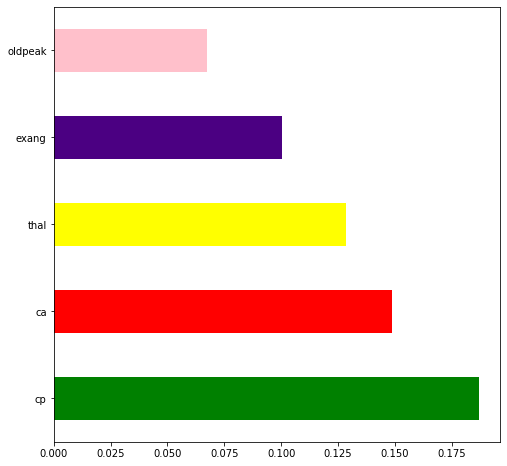

In [32]:
f_importance = pd.Series(ex_reg.feature_importances_, index=X.columns)
f_importance.nlargest(5).plot(kind='barh', color=('green', 'red', 'yellow', 'indigo', 'pink')) # if there are many features pick the top 5
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3
)

In [27]:
X_train.shape

(717, 13)

In [28]:
X_test.shape

(308, 13)

In [29]:
y_train.shape

(717,)

In [30]:
from sklearn.dummy import DummyRegressor

d_reg = DummyRegressor()

d_reg.fit(X_train, y_train)

DummyRegressor()

In [31]:
y_baseline = d_reg.predict(X_test)
y_baseline

array([0.51046025, 0.51046025, 0.51046025, 0.51046025, 0.51046025,
       0.51046025, 0.51046025, 0.51046025, 0.51046025, 0.51046025,
       0.51046025, 0.51046025, 0.51046025, 0.51046025, 0.51046025,
       0.51046025, 0.51046025, 0.51046025, 0.51046025, 0.51046025,
       0.51046025, 0.51046025, 0.51046025, 0.51046025, 0.51046025,
       0.51046025, 0.51046025, 0.51046025, 0.51046025, 0.51046025,
       0.51046025, 0.51046025, 0.51046025, 0.51046025, 0.51046025,
       0.51046025, 0.51046025, 0.51046025, 0.51046025, 0.51046025,
       0.51046025, 0.51046025, 0.51046025, 0.51046025, 0.51046025,
       0.51046025, 0.51046025, 0.51046025, 0.51046025, 0.51046025,
       0.51046025, 0.51046025, 0.51046025, 0.51046025, 0.51046025,
       0.51046025, 0.51046025, 0.51046025, 0.51046025, 0.51046025,
       0.51046025, 0.51046025, 0.51046025, 0.51046025, 0.51046025,
       0.51046025, 0.51046025, 0.51046025, 0.51046025, 0.51046025,
       0.51046025, 0.51046025, 0.51046025, 0.51046025, 0.51046

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [33]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [34]:
lin_reg.coef_

array([-0.00126771, -0.21774274,  0.10807182, -0.00278803, -0.00046305,
        0.03311808,  0.02900975,  0.00287274, -0.14395053, -0.04468846,
        0.09397973, -0.09494331, -0.11556494])

In [35]:
lin_reg.intercept_

0.9689383758924025

In [36]:
y_pred = lin_reg.predict(X_test)

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    ' R2 regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
    )
)

print(
    ' mean_absolute_error = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
    )
)

print(
    ' mean_squared_error = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
    )
)

 R2 regressor = 0.53 vs Baseline = -0.00
 mean_absolute_error = 0.28 vs Baseline = 0.50
 mean_squared_error = 0.12 vs Baseline = 0.25


            53% accurate

In [38]:
# check coefficients

df_feature_importance = pd.DataFrame(
    {
        'features': X_train.columns,
        'coeff': lin_reg.coef_,
        'ABS(coeff)': abs(lin_reg.coef_)
    }
)

In [ ]:
'''
As we can see in these results, some coefficients are positive and others are negative. A
positive coefficient means that the feature correlates positively with the target and vice
versa
'''

In [39]:
df_feature_importance

,features,coeff,ABS(coeff)
0,age,-0.001268,0.001268
1,sex,-0.217743,0.217743
2,cp,0.108072,0.108072
3,trestbps,-0.002788,0.002788
4,chol,-0.000463,0.000463
5,fbs,0.033118,0.033118
6,restecg,0.029010,0.029010
7,thalach,0.002873,0.002873
8,exang,-0.143951,0.143951
9,oldpeak,-0.044688,0.044688


In [40]:
# Scaling for more meaningful coefficients

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

lin_reg = LinearRegression()
scaler = StandardScaler()

x_train_scaler = scaler.fit_transform(X_train)
x_test_scaler = scaler.fit_transform(X_test)

lin_reg.fit(x_train_scaler, y_train)

LinearRegression()

In [41]:
y_pred = lin_reg.predict(x_test_scaler)

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    ' R2 regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
    )
)

print(
    ' mean_absolute_error = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
    )
)

print(
    ' mean_squared_error = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
    )
)

 R2 regressor = 0.53 vs Baseline = -0.00
 mean_absolute_error = 0.28 vs Baseline = 0.50
 mean_squared_error = 0.12 vs Baseline = 0.25


        53% after scaling

In [43]:
# adding PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

x_train_poly = poly.fit_transform(X_train)

x_test_poly = poly.transform(X_test)

In [44]:
feature_translator = [
    (f'x{i}', feature) for i, feature in enumerate(X_train.columns, 0)
]

def translate_feature_names(s):
    for key, val in feature_translator:
        s = s.replace(key, val)
    return s

poly_features = [
    translate_feature_names(f) for f in poly.get_feature_names_out()
]

x_train_poly = pd.DataFrame(x_train_poly, columns=poly_features)

x_test_poly = pd.DataFrame(x_test_poly, columns=poly_features)

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=False)

In [46]:
lin_reg.fit(x_train_poly, y_train)

LinearRegression(fit_intercept=False)

In [47]:
y_pred = lin_reg.predict(x_test_poly)

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    ' R2 regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
    )
)

print(
    ' mean_absolute_error = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
    )
)

print(
    ' mean_squared_error = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
    )
)

 R2 regressor = 0.91 vs Baseline = -0.00
 mean_absolute_error = 0.02 vs Baseline = 0.50
 mean_squared_error = 0.02 vs Baseline = 0.25


        91%

In [76]:
# Regularizing the regressor

from sklearn.linear_model import Lasso

las = Lasso(fit_intercept=False, random_state=42)

las.fit(x_train_poly, y_train)

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.052e+01, tolerance: 3.740e-02



Lasso(fit_intercept=False, random_state=42)

In [77]:
y_pred = las.predict(x_test_poly)

In [78]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    ' R2 regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
    )
)

print(
    ' mean_absolute_error = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
    )
)

print(
    ' mean_squared_error = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
    )
)

 R2 regressor = 0.59 vs Baseline = -0.00
 mean_absolute_error = 0.24 vs Baseline = 0.50
 mean_squared_error = 0.10 vs Baseline = 0.25


        59%

In [79]:
# Finding the optimum regularization parameter

from sklearn.linear_model import LassoCV

# Make a list of 50 values between 0.000001 & 1,000,000
alphas = np.logspace(-6, 6, 50)

# We will do 5-fold cross validation
las_cv = LassoCV(alphas=alphas, fit_intercept=False, cv=5)

las_cv.fit(x_train_poly, y_train)

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03788808257095866, tolerance: 0.0298

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1651504445305534, tolerance: 0.0298

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2634686277117737, tolerance: 0.0298

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You migh

LassoCV(alphas=array([1.00000000e-06, 1.75751062e-06, 3.08884360e-06, 5.42867544e-06,
       9.54095476e-06, 1.67683294e-05, 2.94705170e-05, 5.17947468e-05,
       9.10298178e-05, 1.59985872e-04, 2.81176870e-04, 4.94171336e-04,
       8.68511374e-04, 1.52641797e-03, 2.68269580e-03, 4.71486636e-03,
       8.28642773e-03, 1.45634848e-02, 2.55954792e-02, 4.49843267e-02,
       7.90604321e-02, 1.38949549e-0...
       7.19685673e+00, 1.26485522e+01, 2.22299648e+01, 3.90693994e+01,
       6.86648845e+01, 1.20679264e+02, 2.12095089e+02, 3.72759372e+02,
       6.55128557e+02, 1.15139540e+03, 2.02358965e+03, 3.55648031e+03,
       6.25055193e+03, 1.09854114e+04, 1.93069773e+04, 3.39322177e+04,
       5.96362332e+04, 1.04811313e+05, 1.84206997e+05, 3.23745754e+05,
       5.68986603e+05, 1.00000000e+06]),
        cv=5, fit_intercept=False)

In [80]:
y_train_pred = las_cv.predict(x_train_poly)

y_pred = las_cv.predict(x_test_poly)

In [82]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    ' R2 regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
    )
)

print(
    ' mean_absolute_error = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
    )
)

print(
    ' mean_squared_error = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
    )
)

 R2 regressor = 0.72 vs Baseline = -0.00
 mean_absolute_error = 0.18 vs Baseline = 0.50
 mean_squared_error = 0.07 vs Baseline = 0.25


        72% accurate

In [81]:
print(f"LassoCV: Chosen alpha = {las_cv.alpha_}")

LassoCV: Chosen alpha = 0.004714866363457394


            SVR

In [83]:
from sklearn.svm import  SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier

In [84]:
svm_est = Pipeline([('scaler',StandardScaler()),
                    ('svc',OneVsRestClassifier(SVR()))])

In [85]:
Cs = [0.001, 0.01, 0.1, 1]

gammas = [0.001, 0.01, 0.1]

param_grid = dict(svc__estimator__gamma=gammas, svc__estimator__C=Cs)

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

rand_grid = RandomizedSearchCV(svm_est, param_distributions=param_grid,
                            cv=5,n_iter=5,scoring='neg_mean_absolute_error')

rand_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc',
                                              OneVsRestClassifier(estimator=SVR()))]),
                   n_iter=5,
                   param_distributions={'svc__estimator__C': [0.001, 0.01, 0.1,
                                                              1],
                                        'svc__estimator__gamma': [0.001, 0.01,
                                                                  0.1]},
                   scoring='neg_mean_absolute_error')

In [87]:
rand_grid.best_params_

{'svc__estimator__gamma': 0.01, 'svc__estimator__C': 0.1}

In [88]:
rand_grid.best_score_

-0.1743881118881119

        our SVR achieves 17% accuracy - very poor

        Deciscion Trees

In [91]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()

In [92]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [96]:
y_pred = dt_reg.predict(X_test)

In [95]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

1.0

        our Decision Tree achieves 100% accuracy due to overfitting

In [98]:
# Reducing overfitting with cross-validation

from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()

In [99]:
from sklearn.model_selection import GridSearchCV

gs_inst = GridSearchCV(dt_reg, param_grid = {'max_depth':
    [3,5,7,9,20]},cv=10)

gs_inst.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 20]})

In [100]:
gs_inst.best_estimator_

DecisionTreeRegressor(max_depth=20)

In [101]:
y_pred = gs_inst.predict(X_test)

In [103]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9610323886639676

            our Decision Tree achieves 96.1% accuracy

        random forest regression

In [104]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

In [105]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [107]:
y_pred = rf_reg.predict(X_test)

In [109]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9474132085020244

        random forest = 94% accuracy

        BaggingRegressor

In [49]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

In [50]:
param_dist = {
    'max_samples': [0.5,1.0],
    'max_features' : [0.5,1.0],
    'oob_score' : [True, False],
    'base_estimator__n_neighbors': [3,5],
    'n_estimators': [100]
}

In [51]:
single_estimator = KNeighborsRegressor()

ensemble_estimator = BaggingRegressor(base_estimator =single_estimator)

In [52]:
pre_gs_inst_bag = RandomizedSearchCV(ensemble_estimator,
                                    param_distributions = param_dist,
                                    cv=3,
                                    n_iter = 5,
                                    n_jobs=-1)

pre_gs_inst_bag.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=BaggingRegressor(base_estimator=KNeighborsRegressor()),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'base_estimator__n_neighbors': [3, 5],
                                        'max_features': [0.5, 1.0],
                                        'max_samples': [0.5, 1.0],
                                        'n_estimators': [100],
                                        'oob_score': [True, False]})

In [53]:
pre_gs_inst_bag.best_params_

{'oob_score': True,
 'n_estimators': 100,
 'max_samples': 0.5,
 'max_features': 0.5,
 'base_estimator__n_neighbors': 3}

In [55]:
rs_bag = BaggingRegressor(**{'max_features': 0.5,
                            'max_samples': 0.5,
                            'n_estimators': 100,'oob_score': True,
                            'base_estimator': KNeighborsRegressor(n_neighbors=3)})
rs_bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=3),
                 max_features=0.5, max_samples=0.5, n_estimators=100,
                 oob_score=True)

In [56]:
y_pred = rs_bag.predict(X_test)

In [57]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R-squared",r2_score(y_test, y_pred))
print("MAE : ",mean_absolute_error(y_test, y_pred))
print("MAPE : ",(np.abs(y_test - y_pred)/y_test).mean())

R-squared 0.6028337687687687
MAE :  0.2836147186147186
MAPE :  inf


        60% accuracy

                we can also use Decision Trees or Random Forest regressor as the base estimators in a Bagging Regressor

-we can also use Boosting: 
    
        1) GradientBoosting regressor,
        2) AdaBoost regressor

- we can also implement:

        1) stacking regressor